<a href="https://colab.research.google.com/github/ShawnTayNWU/MSDS460/blob/Assignments/MSDS_460_Assignment_1_Q5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Question 5:
A company wants to plan production for the ensuing year to minimize the combined cost of production and inventory costs.  In each quarter of the year, demand is anticipated to be 130, 160, 250, and 150 units, respectively.  The plant can produce a maximum of 200 units each quarter.  The product can be manufactured at a cost of 15 dollars per unit during the first quarter, however the manufacturing cost is expected to rise by 1 dollar per quarter.  Excess production can be stored from one quarter to the next at a cost of 1.50 dollars per unit, but the storage facility can hold a maximum of 60 units.  How should the production be scheduled so as to minimize the total costs?  

Part A:  Formulate an LP model to minimize costs.

Part B:  Solve the LP (provide exact values for all variables and the optimal objective function).


## 1. Import Packages

In [ ]:
 !pip install pulp #Run this only the first time, no need to install each time

# import the library pulp as p
import pulp as p
  


## 2. Define variables, problem, objective function and constraints







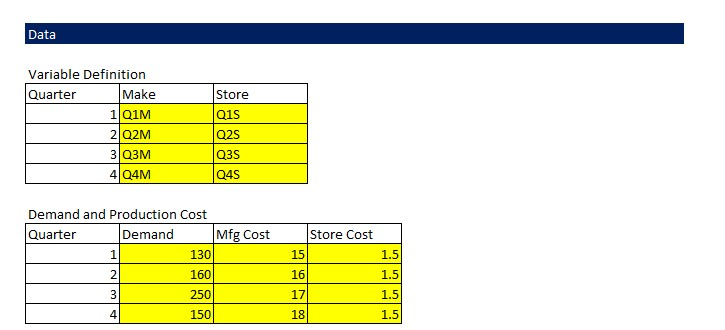

In [ ]:
 # Create a LP Minimization problem
Lp_prob = p.LpProblem('Problem', p.LpMinimize) 
  
# Create problem Variables 
Q1M = p.LpVariable("Q1M", lowBound = 0, cat='Integer')  # Create a variable Q1M >= 0, Q1 Mfg
Q2M = p.LpVariable("Q2M", lowBound = 0, cat='Integer')  # Create a variable Q2M >= 0, Q2 Mfg
Q3M = p.LpVariable("Q3M", lowBound = 0, cat='Integer')  # Create a variable Q3M >= 0, Q3 Mfg
Q4M = p.LpVariable("Q4M", lowBound = 0, cat='Integer')  # Create a variable Q1M >= 0, Q4 Mfg
Q1S = p.LpVariable("Q1S", lowBound = 0, cat='Integer')  # Create a variable Q1S >= 0, Q1 Storage
Q2S = p.LpVariable("Q2S", lowBound = 0, cat='Integer')  # Create a variable Q2S >= 0, Q2 Storage
Q3S = p.LpVariable("Q3S", lowBound = 0, cat='Integer')  # Create a variable Q3S >= 0, Q3 Storage
# No Q4S as we assume Q4S = 0 due to no year end storage
  
# Objective Function
Lp_prob += Q1M*15 + Q1S*1.5 + Q2M*16 + Q2S*1.5+ Q3M*17 + + Q3S*1.5 + Q4M*18  # increases a dollar each quarter and storage costs $1.5

# Constraints:
# 1. Production Max of 200 per quarter
Lp_prob += Q1M <=200                                                                     
Lp_prob += Q2M <=200        
Lp_prob += Q3M <=200
Lp_prob += Q4M <=200    

# 2. Max Storage of 60 per quarter
Lp_prob += Q1S <=60                                                                     
Lp_prob += Q2S <=60        
Lp_prob += Q3S <=60
#Assume Q4 Ends with 0 inventory

# 3. Demand per quarter

Lp_prob += Q1M - Q1S == 130           # Q1S = Q1M-130 or Q1M - Q1S = 130
Lp_prob += Q2M - Q2S + Q1S == 160    # Q2S=Q2M+Q1S-160 or Q2M+Q1S-Q2S=160
Lp_prob += Q3M - Q3S + Q2S == 250    # Q3S=Q3M+Q2S-250 or Q3M+Q2S-Q3S=250
Lp_prob += Q4M + Q3S == 150           # Q4M+Q3S-150=0


  
# Display the problem
print(Lp_prob)


Problem:
MINIMIZE
15*Q1M + 1.5*Q1S + 16*Q2M + 1.5*Q2S + 17*Q3M + 1.5*Q3S + 18*Q4M + 0.0
SUBJECT TO
_C1: Q1M <= 200

_C2: Q2M <= 200

_C3: Q3M <= 200

_C4: Q4M <= 200

_C5: Q1S <= 60

_C6: Q2S <= 60

_C7: Q3S <= 60

_C8: Q1M - Q1S = 130

_C9: Q1S + Q2M - Q2S = 160

_C10: Q2S + Q3M - Q3S = 250

_C11: Q3S + Q4M = 150

VARIABLES
0 <= Q1M Integer
0 <= Q1S Integer
0 <= Q2M Integer
0 <= Q2S Integer
0 <= Q3M Integer
0 <= Q3S Integer
0 <= Q4M Integer



## 3. Solve Problem and print outputs

In [ ]:
# Solve the problem
status = Lp_prob.solve()
print(f"Problem 5")
print(f"status={p.LpStatus[status]}")

# Print the results
for variable in Lp_prob.variables():
    print(f"{variable.name} = {variable.varValue}")
    
print(f"Objective = {p.value(Lp_prob.objective)}")
print(f"")

Problem 5
status=Optimal
Q1M = 140.0
Q1S = 10.0
Q2M = 200.0
Q2S = 50.0
Q3M = 200.0
Q3S = 0.0
Q4M = 150.0
Objective = 11490.0



In [ ]:
# Solve the problem
status = Lp_prob.solve()
print(f"Problem 1")
print(f"status={p.LpStatus[status]}")

# Print the results
for variable in Lp_prob.variables():
    print(f"{variable.name} = {variable.varValue}")
    
print(f"Objective = {p.value(Lp_prob.objective)}")
print(f"")

Problem 1
status=Optimal
Q1M = 140.0
Q1S = 10.0
Q2M = 200.0
Q2S = 50.0
Q3M = 200.0
Q3S = 0.0
Q4M = 150.0
Objective = 11490.0

